In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:\\Users\\user\\Desktop\\intern data\\concrete (1).csv")
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [3]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [5]:
print(data.describe)

<bound method NDFrame.describe of       cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2 

In [6]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

Looking for is there any NAN values

In [8]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
data.shape

(1030, 9)

In [10]:
data.values

array([[141.3 , 212.  ,   0.  , ..., 748.5 ,  28.  ,  29.89],
       [168.9 ,  42.2 , 124.3 , ..., 796.2 ,  14.  ,  23.51],
       [250.  ,   0.  ,  95.7 , ..., 861.2 ,  28.  ,  29.22],
       ...,
       [276.4 , 116.  ,  90.3 , ..., 768.3 ,  28.  ,  44.28],
       [342.  ,  38.  ,   0.  , ..., 670.  , 270.  ,  55.06],
       [540.  ,   0.  ,   0.  , ..., 613.  ,   7.  ,  52.61]])

Take X as cement, slag, ash, water, superplastic, coarseagg, fineagg and age

In [11]:
X=data[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']]

Take Y as strength

In [12]:
Y=data['strength']

In [13]:
print(X)

      cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28
...      ...    ...    ...    ...           ...        ...      ...  ...
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7

[1030 rows x 8 columns]


In [14]:
print(Y)

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: strength, Length: 1030, dtype: float64


In [15]:
X

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28
...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270


In [16]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [17]:
X.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7


In [18]:
Y

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: strength, Length: 1030, dtype: float64

In [19]:
print(X.shape)

(1030, 8)


In [20]:
X.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [21]:
X.values

array([[ 141.3,  212. ,    0. , ...,  971.8,  748.5,   28. ],
       [ 168.9,   42.2,  124.3, ..., 1080.8,  796.2,   14. ],
       [ 250. ,    0. ,   95.7, ...,  956.9,  861.2,   28. ],
       ...,
       [ 276.4,  116. ,   90.3, ...,  870.1,  768.3,   28. ],
       [ 342. ,   38. ,    0. , ...,  932. ,  670. ,  270. ],
       [ 540. ,    0. ,    0. , ..., 1125. ,  613. ,    7. ]])

In [22]:
  X.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [23]:
Y.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

In [24]:
print(Y.shape)

(1030,)


In [25]:
Y.values

array([29.89, 23.51, 29.22, ..., 44.28, 55.06, 52.61])

We can look the prediction of Strength by using LinearRegression,RandomForestRegresson,ElasticNet,BaggingRegresson, SVM

By using train test split. We can split the Data in to train and test data. Taking Test Data size as 20%

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [28]:
print(X_train)

     cement   slag    ash  water  superplastic  coarseagg  fineagg  age
995   380.0    0.0    0.0  228.0           0.0      932.0    670.0  365
507   251.8    0.0   99.9  146.1          12.4     1006.0    899.8   28
334   323.7  282.8    0.0  183.8          10.3      942.7    659.9    3
848   252.3    0.0   98.8  146.3          14.2      987.8    889.0   56
294   238.2  158.8    0.0  185.7           0.0     1040.6    734.3   28
..      ...    ...    ...    ...           ...        ...      ...  ...
87    212.5    0.0  100.4  159.3           8.7     1007.8    903.6   14
330   167.4  129.9  128.6  175.5           7.8     1006.3    746.6   14
466   439.0  177.0    0.0  186.0          11.1      884.9    707.9    3
121   250.0    0.0   95.7  191.8           5.3      948.9    857.2   56
860   162.0  190.0  148.0  179.0          19.0      838.0    741.0   28

[824 rows x 8 columns]


In [29]:
print(X_test)

     cement   slag    ash  water  superplastic  coarseagg  fineagg  age
31    475.0    0.0    0.0  228.0           0.0      932.0    594.0   28
109   326.5    0.0  137.9  199.0          10.8      801.1    792.5   28
136   166.8  250.2    0.0  203.5           0.0      975.6    692.6   90
88    362.6  189.0    0.0  164.9          11.6      944.7    755.8    3
918   239.6  359.4    0.0  185.7           0.0      941.6    664.3   28
..      ...    ...    ...    ...           ...        ...      ...  ...
482   425.0  106.3    0.0  153.5          16.5      852.1    887.1   91
545   424.0   22.0  132.0  168.0           8.9      822.0    750.0   28
110   397.0   17.2  158.0  167.0          20.8      967.0    633.0   28
514   297.2    0.0  117.5  174.8           9.5     1022.8    753.5   56
602   143.6    0.0  174.9  158.4          17.9      942.7    844.5   28

[206 rows x 8 columns]


In [30]:
print(Y_train)

995    52.52
507    33.94
334    28.30
848    55.83
294    26.91
       ...  
87     26.31
330    31.81
466    39.30
121    39.64
860    33.76
Name: strength, Length: 824, dtype: float64


In [31]:
print(Y_test)

31     39.29
109    38.63
136    43.57
88     35.30
918    39.44
       ...  
482    65.20
545    72.10
110    55.65
514    51.96
602    15.42
Name: strength, Length: 206, dtype: float64


By using Linear Regression

In [32]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)
print('predictions: ',y_pred)

predictions:  [31.6340508  35.17761265 33.96821269 51.12485721 48.52807899 20.08912449
 14.78221971 42.66467883 20.97144761 22.22290224 61.49514675 22.2066367
 31.68684613 18.78998622 28.74415941 61.0494823  36.55004987 15.69280358
 22.74585531 51.12485721 25.58287656 33.50509053 32.13192081 37.22769492
 22.17036291 27.23756676 33.71431136 35.13042602 18.15705918 37.25243829
 29.7387455  26.46697226 69.057562   18.15705918 17.49399308 35.02519639
 75.65699885 27.98105337 21.60913571 37.56566619 39.7366332  22.26854409
 39.78770571 21.31625886 35.55497284 37.15063613 28.22474403 47.61853159
 47.49331284 27.49061166 48.22837794 38.73161679 51.70548521 65.22720027
 26.18799539 19.5702876  38.04027266 28.68975285 57.17252618 21.8807915
 28.74472234 47.80649885 27.58516546 54.02202348 25.49374367 25.72444878
 51.58289213 60.35769119 47.26800478 48.80831893 30.92427207 18.28949625
 20.29538605 36.62713559 20.29614527 17.82594964 24.25738231 24.48684424
 46.21842286 52.43922309 36.46665817 54

Predicted values by using Linear Regression

In [33]:
print('The predicted values',y_pred)

The predicted values [31.6340508  35.17761265 33.96821269 51.12485721 48.52807899 20.08912449
 14.78221971 42.66467883 20.97144761 22.22290224 61.49514675 22.2066367
 31.68684613 18.78998622 28.74415941 61.0494823  36.55004987 15.69280358
 22.74585531 51.12485721 25.58287656 33.50509053 32.13192081 37.22769492
 22.17036291 27.23756676 33.71431136 35.13042602 18.15705918 37.25243829
 29.7387455  26.46697226 69.057562   18.15705918 17.49399308 35.02519639
 75.65699885 27.98105337 21.60913571 37.56566619 39.7366332  22.26854409
 39.78770571 21.31625886 35.55497284 37.15063613 28.22474403 47.61853159
 47.49331284 27.49061166 48.22837794 38.73161679 51.70548521 65.22720027
 26.18799539 19.5702876  38.04027266 28.68975285 57.17252618 21.8807915
 28.74472234 47.80649885 27.58516546 54.02202348 25.49374367 25.72444878
 51.58289213 60.35769119 47.26800478 48.80831893 30.92427207 18.28949625
 20.29538605 36.62713559 20.29614527 17.82594964 24.25738231 24.48684424
 46.21842286 52.43922309 36.4666

The score of the Linear Regression model

In [35]:
rl=r2_score(Y_test,y_pred)
print('The score of Linear Regression',rl)

The score of Linear Regression 0.6081118525118778


The score is : 0.6081118525118778

TO find the mean squared error of Linear Regression

In [37]:
error_linear=mean_squared_error(Y_test,y_pred)
print('mean squared error of Linear Regression',error_linear)

mean squared error of Linear Regression 112.13426963981124


The mean squared error of Linear Regression is 112.13426963981124

By using Random Forest Regression

In [38]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)
prediction_Random_Forest=model.predict(X_test)

Predicted values of the Random Forest Regression

In [39]:
print('Predicted values by using Random Forest',prediction_Random_Forest)

Predicted values by using Random Forest [39.1324     39.2489     47.5312     34.93953333 38.9754     13.5688
  8.8483     51.8483     15.8045     13.0581     36.8031     30.3902
 20.82535    16.2922     23.1507     60.0212     30.8685     10.659
 22.6026     34.93953333 28.8718     36.9246     28.5068     27.50963333
 25.1452     32.3168     33.6827     26.4503     19.7308     50.5863
 16.2301     27.7329     41.7521     19.7308     29.0897     39.3041
 58.6791     41.8795     23.4149     49.5868     54.4335     26.9565
 36.1356     27.9101     39.4324     35.6163     17.1632     40.6456
 48.4937     14.9032     47.81951429 43.0688     66.0592     58.4841
 18.5393     11.4228     40.7125     22.277      58.31581643 28.2217
 34.5726     45.396      14.0839     71.212      15.0429     15.0782
 48.7924     64.3358     50.3528     38.30665833 49.7278     13.4473
 15.9579     42.5632     15.5028      9.3582     30.7076     11.376
 61.609725   38.6422     30.935      71.5051     37.874      

The score of the Random Forest Regression model.

In [40]:
r2 = r2_score(Y_test,prediction_Random_Forest)
print('The score of Random Forest Regression',r2)

The score of Random Forest Regression 0.9117909557650435


The score is 0.9117909557650435

In [41]:
error_random=mean_squared_error(Y_test,prediction_Random_Forest)
print('mean squared error by using Random Forest',error_random)

mean squared error by using Random Forest 25.239999766036398


The mean squared error of model by using Random Forest Regression is 25.239999766036398

By using Elastic Net Regression

In [42]:
ela_reg=ElasticNet()
ela_reg.fit(X_train,Y_train)

ElasticNet()

The predicted values by using Elastic Net Regression

In [43]:
ela_predict=ela_reg.predict(X_test)
print('Predicted values by Elastic Net',ela_predict)

Predicted values by Elastic Net [31.73900848 35.16833481 34.04013098 51.01746154 48.76713432 20.07572264
 14.95004913 42.47972631 21.03269311 22.1749363  61.50893965 22.20798374
 32.0442729  18.82095377 28.97878146 60.74405963 36.86426742 15.84808641
 22.60468777 51.01746154 25.52729833 33.65430638 32.19762975 37.52637656
 22.32263663 27.14022426 33.6940099  35.69598574 18.18291987 37.21286376
 29.88009476 26.3682763  69.03144557 18.18291987 17.56602802 34.95375028
 75.59471998 28.02955858 21.57048852 37.39463373 39.8355505  22.38245422
 39.5823808  21.48224225 35.51705456 37.18202321 28.33817377 47.65094269
 47.72036112 27.37026637 48.18288592 38.5805841  51.88453339 65.19339426
 26.15033787 19.72835272 38.06947542 28.82488681 57.17870725 21.94285588
 28.53188245 48.019784   27.58159711 53.90671869 25.48183774 25.68805673
 51.42578777 60.17884606 47.30234546 48.99527624 30.69590626 18.35208932
 20.35487791 36.67985303 20.65971854 17.88980817 24.41786873 24.68020377
 46.06501524 52.128

The score of the Elastic Net Regression model

In [44]:
ela_score=r2_score(Y_test,ela_predict)
print('The score of Elastic Net Regression',ela_score)

The score of Elastic Net Regression 0.6080299222841914


The score is0.6080299222841914

In [45]:
error_ela=mean_squared_error(Y_test,ela_predict)
print('mean squared error by using Elastic Net Regression',error_ela)

mean squared error by using Elastic Net Regression 112.15771302870145


The mean squared error of Elastic Net Regression model is 112.15771302870145

By using Bagging Regression

In [46]:
bagging_regressor=BaggingRegressor()
bagging_regressor.fit(X_train,Y_train)

BaggingRegressor()

In [47]:
bagging_predictions=bagging_regressor.predict(X_test)

Predicted values by using Bagging Regression

In [48]:
print('Bagging predictions',bagging_predictions)

Bagging predictions [38.828      40.728      47.927      35.21       41.606      13.477
  9.27       53.544      15.849      13.353      38.518      28.953
 26.481      18.683      20.653      61.6        29.965      11.939
 21.88       35.21       25.801      37.186      25.06       27.308
 25.753      33.26       33.423      30.279      19.328      52.096
 19.624      26.745      41.787      19.328      31.402      38.494
 58.131      45.088      23.388      50.111      54.808      29.271
 34.956      25.945      40.404      36.942      18.238      40.875
 51.689      12.641      47.653      41.878      67.174      57.267
 17.748      12.768      41.448      23.377      58.75866667 28.838
 38.412      46.27       14.211      69.16       14.313      14.313
 47.63525    64.049      50.215      34.727      46.48       12.963
 17.945      41.265      13.147       9.311      30.819      12.424
 56.28       39.106      29.965      69.389      42.151      41.964
 39.402      65.907      21.

The score of the Bagging Regression model

In [49]:
Bagging_score=r2_score(Y_test,bagging_predictions)
print('The score of Bagging Regression',Bagging_score)

The score of Bagging Regression 0.8964960763458119


The score is 0.8964960763458119

In [50]:
error_bagging=mean_squared_error(Y_test,bagging_predictions)
print('mean squared error by using Bagging Regression',error_bagging)

mean squared error by using Bagging Regression 29.616452955288572


The mean squared error of Bagging Regression model is 29.616452955288572

By using SVM(Support Vector Machine)

In [52]:
svr_regression=SVR(kernel='rbf')
svr_regression.fit(X_train,Y_train)

SVR()

The predicted values by using SVM

In [53]:
svr_prediction=svr_regression.predict(X_test)
print('Prediction of SVR',svr_prediction)

Prediction of SVR [40.5070679  35.78703443 33.4750535  38.09980674 36.56500423 27.98738619
 28.3070284  32.74816856 32.48026022 30.50372345 39.80141102 30.05343011
 33.81972196 31.20302743 36.39106557 37.85389772 31.62125767 29.36742421
 30.47726875 38.09980674 29.95077953 36.75155675 33.53254147 39.86013319
 30.27327972 31.38409555 35.34415917 29.32032631 30.51096034 31.18925873
 29.27835101 31.31377224 44.43635999 30.51096034 30.45551224 32.90145606
 45.01699397 31.75373525 29.88028892 31.78655093 37.02629813 32.44941513
 31.68180346 29.83567054 35.60719884 33.26721942 32.43262617 41.5391374
 35.08940048 28.38552592 37.56865616 30.50164334 41.42288305 43.64038393
 33.7207711  30.64155722 33.92519844 35.21433181 40.43697276 33.78172683
 30.56039259 37.46115167 29.30598859 38.63795343 33.71746812 33.63452833
 37.14219563 40.3026216  35.01908467 40.93089041 31.4118349  29.78671168
 31.85806253 34.36083059 34.25846795 29.70130089 34.64038258 31.01030758
 38.73281434 37.31718876 31.622629

In [54]:
error_svr=mean_squared_error(Y_test,svr_prediction)
print('mean squared error by using SVM',error_svr)

mean squared error by using SVM 216.74483176528125


The mean squared error of SVM model is 216.74483176528125

In [55]:
svr_score=r2_score(Y_test,svr_prediction)
print('The score of SVM',svr_score)

The score of SVM 0.24251764539995302


We can look the diffrence between every predicted values and true values in one Data Frame

In [56]:
Y_true=Y_test
Predicted_data={'True Strength value' : Y_true,
         'predicted values by using Random Forest Regression':prediction_Random_Forest,
          'Predicted values by using Bagging Regression ': bagging_predictions,
         'Predicted values by using Linear Regression ':y_pred,
         'Predicted values by using Elastic Net Regression ': ela_predict,
         'predicted values by using SVM':svr_prediction
        }
Predicted_data=pd.DataFrame(Predicted_data)
Predicted_data

,True Strength value,predicted values by using Random Forest Regression,Predicted values by using Bagging Regression,Predicted values by using Linear Regression,Predicted values by using Elastic Net Regression,predicted values by using SVM
31,39.29,39.132400,38.828000,31.634051,31.739008,40.507068
109,38.63,39.248900,40.728000,35.177613,35.168335,35.787034
136,43.57,47.531200,47.927000,33.968213,34.040131,33.475053
88,35.30,34.939533,35.210000,51.124857,51.017462,38.099807
918,39.44,38.975400,41.606000,48.528079,48.767134,36.565004
...,...,...,...,...,...,...
482,65.20,65.226000,65.200000,64.413724,64.223806,41.008283
545,72.10,62.528477,56.803000,52.241454,52.580205,39.877572
110,55.65,54.494936,51.378667,54.561868,54.267968,38.652685
514,51.96,51.716700,53.933000,39.510224,39.397749,34.091847


In [65]:
Predicted_data.head()

,True Strength value,predicted values by using Random Forest Regression,Predicted values by using Bagging Regression,Predicted values by using Linear Regression,Predicted values by using Elastic Net Regression,predicted values by using SVM
31,39.29,39.132400,38.828,31.634051,31.739008,40.507068
109,38.63,39.248900,40.728,35.177613,35.168335,35.787034
136,43.57,47.531200,47.927,33.968213,34.040131,33.475053
88,35.30,34.939533,35.210,51.124857,51.017462,38.099807
918,39.44,38.975400,41.606,48.528079,48.767134,36.565004


In [66]:
Predicted_data.tail()

,True Strength value,predicted values by using Random Forest Regression,Predicted values by using Bagging Regression,Predicted values by using Linear Regression,Predicted values by using Elastic Net Regression,predicted values by using SVM
482,65.20,65.226000,65.200000,64.413724,64.223806,41.008283
545,72.10,62.528477,56.803000,52.241454,52.580205,39.877572
110,55.65,54.494936,51.378667,54.561868,54.267968,38.652685
514,51.96,51.716700,53.933000,39.510224,39.397749,34.091847
602,15.42,16.380500,15.034000,27.808681,27.655290,28.419059


In [57]:
Predicted_data[0:60]

,True Strength value,predicted values by using Random Forest Regression,Predicted values by using Bagging Regression,Predicted values by using Linear Regression,Predicted values by using Elastic Net Regression,predicted values by using SVM
31,39.29,39.132400,38.828000,31.634051,31.739008,40.507068
109,38.63,39.248900,40.728000,35.177613,35.168335,35.787034
136,43.57,47.531200,47.927000,33.968213,34.040131,33.475053
88,35.30,34.939533,35.210000,51.124857,51.017462,38.099807
918,39.44,38.975400,41.606000,48.528079,48.767134,36.565004
1025,13.29,13.568800,13.477000,20.089124,20.075723,27.987386
870,10.09,8.848300,9.270000,14.782220,14.950049,28.307028
318,51.06,51.848300,53.544000,42.664679,42.479726,32.748169
261,17.24,15.804500,15.849000,20.971448,21.032693,32.480260
535,19.93,13.058100,13.353000,22.222902,22.174936,30.503723


Plot the predicted and Actual Values of Random Forest Regression model

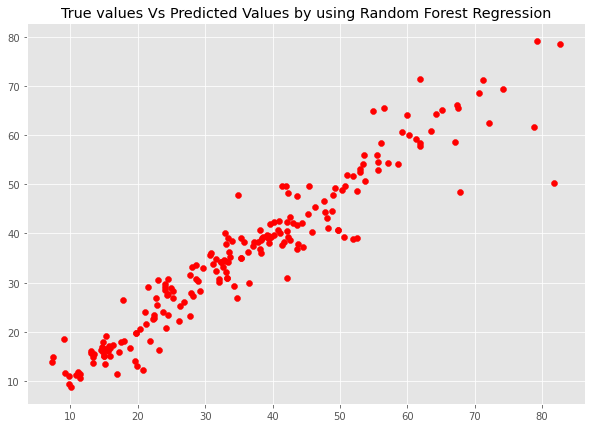

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.scatter(Predicted_data['True Strength value'],Predicted_data['predicted values by using Random Forest Regression'],color='red')
plt.title("True values Vs Predicted Values by using Random Forest Regression")
plt.show()

Plot the predicted and Actual Values of Bagging Regression model

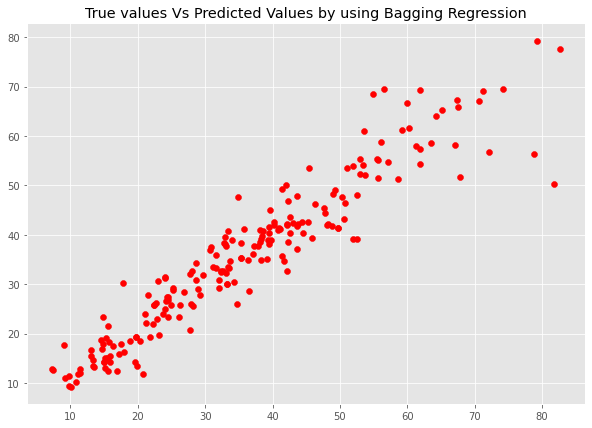

In [61]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.scatter(Predicted_data['True Strength value'],Predicted_data['Predicted values by using Bagging Regression '],color='red')
plt.title("True values Vs Predicted Values by using Bagging Regression")
plt.show()

Plot the predicted and Actual Values of Linear Regression model

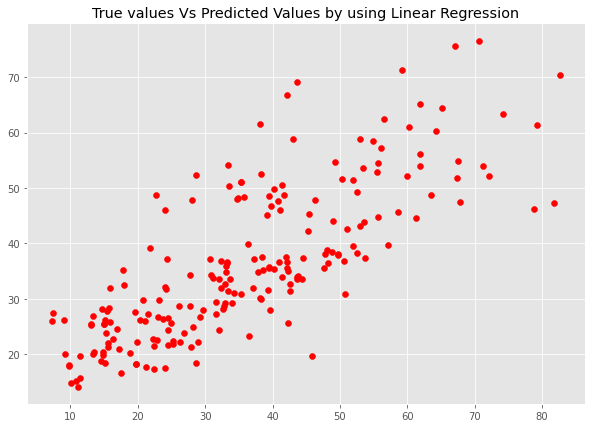

In [62]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.scatter(Predicted_data['True Strength value'],Predicted_data['Predicted values by using Linear Regression '],color='red')
plt.title("True values Vs Predicted Values by using Linear Regression")
plt.show()

Plot the predicted and Actual Values of Elastic Net model

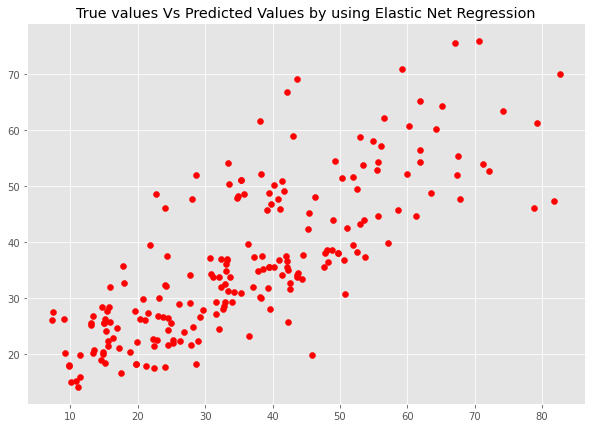

In [63]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.scatter(Predicted_data['True Strength value'],Predicted_data['Predicted values by using Elastic Net Regression '],color='red')
plt.title("True values Vs Predicted Values by using Elastic Net Regression")
plt.show()

Plot the predicted and Actual Values of SVM model

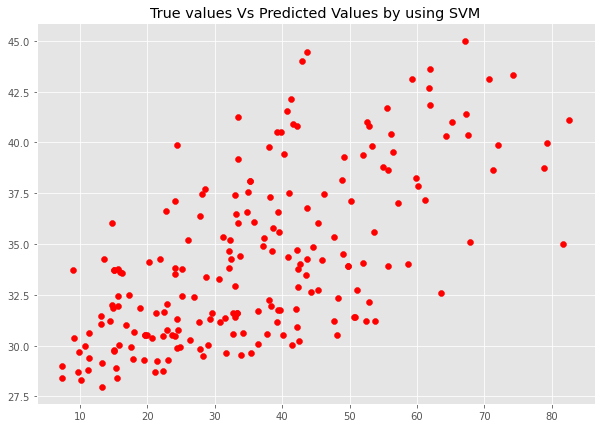

In [64]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.scatter(Predicted_data['True Strength value'],Predicted_data['predicted values by using SVM'],color='red')
plt.title("True values Vs Predicted Values by using SVM")
plt.show()

 Random Forest model have the score above 90.

*) Random Forest model score :  0.9117909557650435

Conclusion:

From these models we can take Random Forest model. Because Random Forest model have highest score when compared to other models(Linear, Bagging, Elastic Net, SVM)

From above graphs we can understand that the Random Forest model graph give perfect Linear line when compared to other model graphs. This shows that Random Forest is perfect one for predicting concrete strength. Because this model have Highest score: 0.9117909557650435 and also have lowest mean squared error : 25.239999766036398. So we can take this model for predicting strength of concrete

Feature selection

The important Features for predicting strength of concrete is cement, slag, ash,water, superplastic, coarseagg, fineagg and age